# HOMEWORK: LEPTON CIRCULAR ACCELERATOR DESIGN

1. We want to design a circular accelerator for 4 GeV electrons composed by FODO lattices according to the following conditions:
        
    - We have only have normal conducting magnets at our disposal with max. field strengths
        - For dipole magnets: Bmax ≤ 2 T and ld ≤ 5 m.
        - For quadrupole magnets: dBy/dx|max ≤ 25 T/m & and ≤1.5 m.
     
    - Considering 4 dipoles per FODO cell.
    
    - Circumference of the ring < 1000 maccounting for the FODO cells and about ~30% margin for other insertions (also, pick a nice round number). 
    
    - We start with a μ=90° FODO lattices with the help of the thin lense approximation parametric plots from Tutorial 1 set the strenght of quadrupoles such that the βmax is around 100 m. (HINT: use both plots to define the lenght of the FODO cell and the strenght for a fixed quadrupole lenght of your choice)


2. Define a lattice according to the boundary conditions defined above, and find the optics using MAD-X. 

4. Refine the design using the matching MADX tool to set the betxmax closer to the desired value using the "CONSTRAINT" command as follow:

        MATCH, SEQUENCE=myCell;
        CONSTRAINT, SEQUENCE=myCell, RANGE=q1, BETX=100.0;
        VARY, NAME= myKF, STEP=0.00001;
        LMDIF, CALLS=50, TOLERANCE=1e-6;//method adopted
        ENDMATCH;
        
5. Considering a round beam (same horizontal and vertical sizes) and an emittance value of 4.58 nm rad compute the required beta-functions for a maximum beam size value of 


In [ ]:
np.sqrt(4.58e-9*

In [261]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from cpymad.madx import Madx 

In [345]:
#Values for bmax=100
#From the parametric plots we can get that for a phase advance of 90 degrees K*Lcell*Lq=2.827
#And for this value on the second plot bmax/lcell=1.694
#If bmax=200 -> Lcell=
print(150/1.694)
#And the k=
print(2.827/89)

88.5478158205431
0.03176404494382022


In [280]:
#We need to check that the required strnght is available by the magnets at our disposal
# k=0.3*G[T/m]/P[GeV/c]*c*q[e]
0.024*4/0.3

0.32

In [348]:
#We need to compute now the required dipoles strenght and number of dipoles
#1/rho=0.3*B[T]/P[GeV/c]*c*q[e]
1/(0.3*0.5/4)

26.666666666666668

In [349]:
#And compute the corresponding angle
#theta=ld/rho
2/27

0.07407407407407407

In [350]:
#We compute now the number of dipoles required to have a circular orbit
#2*pi=Nd*theta
2*np.pi/0.074

84.9079095564809

In [351]:
#If we consider 4 dipoles per FODO cell we need then the following number of FODO cells:
85/4

21.25

In [352]:
#Compute the total lenght of the accelerator circunference: Lcell*7 + 30% of Ctot
22*60/0.7

1885.7142857142858

In [353]:
myMad = Madx()
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

quadrupoleLength=1;
dipoleLength=5;
cellLength=89;
nbend=7*4;

myK=0.031;
myAngle=0.074;

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

QF: quadrupole, L=quadrupoleLength, K1:=myK;
QD: quadrupole, L=quadrupoleLength, K1:=-myK;
BM: sbend, L=dipoleLength, angle:=myAngle; 

! *********************************************************************
! Definition of sequence
! *********************************************************************

myCell:sequence, refer=entry, L=cellLength;
q1: QF, at=0;
B1: BM, at =5+quadrupoleLength/2, from=q1;
B2: BM, at =5+dipoleLength/2, from=B1;
q2: QD, at=cellLength/2;
B3: BM, at =5+quadrupoleLength/2, from=q2;
B4: BM, at =5+dipoleLength/2, from=B3;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=electron, energy=4;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************
twiss, table=first_twiss, file=exercice.txt;
plot, table=first_twiss, haxis=s, vaxis=betx,bety ,colour=100, file=exercice;

'''
myMad.input(myString);



  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.12.08 18:47:58      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
                89                 -0       0.0364182989        5.240107203 

                q1                dq1            betxmax              dxmax 
      0.2646771955      -0.2889469126         140.980247        15.68114778 

             dxrms             xcomax             xcorms                 q2 
       12.24148836                  0                  0       0.2400057369 

               dq2            betymax              dymax              dyrms 
      -0.298620479        

In [295]:
first_df=myMad.table['first_twiss'].dframe()
first_df[["name", "keyword","s","betx","bety","alfx","alfy","dx","dpx","dy","dpy"]]

,name,keyword,s,betx,bety,alfx,alfy,dx,dpx,dy,dpy
#s,mycell$start:1,marker,0.0,99.590115,18.479471,-2.488930,0.459864,17.154694,0.397322,0.0,-0.0
q1,q1:1,quadrupole,1.0,99.876720,18.479471,2.206830,-0.459864,17.147352,-0.411948,0.0,0.0
drift_0[0],drift_0:0,drift,6.0,79.277755,24.717064,1.912963,-0.787654,15.087612,-0.411948,0.0,0.0
b1,b1:1,sbend,11.0,58.372481,34.232551,2.199179,-1.115443,13.227209,-0.329154,0.0,0.0
drift_1[0],drift_1:0,drift,16.0,38.880323,47.025932,1.699253,-1.443233,11.581436,-0.329154,0.0,0.0
b2,b2:1,sbend,21.0,23.014558,63.097209,1.421600,-1.771022,10.217654,-0.214116,0.0,0.0
drift_2[0],drift_2:0,drift,30.0,8.058015,100.285803,0.240238,-2.361044,8.290608,-0.214116,0.0,0.0
q2,q2:1,quadrupole,31.0,8.080371,100.285803,-0.262943,2.361044,8.270404,0.173550,0.0,0.0
drift_3[0],drift_3:0,drift,36.0,14.017629,78.314315,-0.924509,2.033254,9.138155,0.173550,0.0,0.0
b3,b3:1,sbend,41.0,25.536211,59.620722,-1.341237,1.705465,10.327262,0.300137,0.0,0.0


<IPython.core.display.Javascript object>


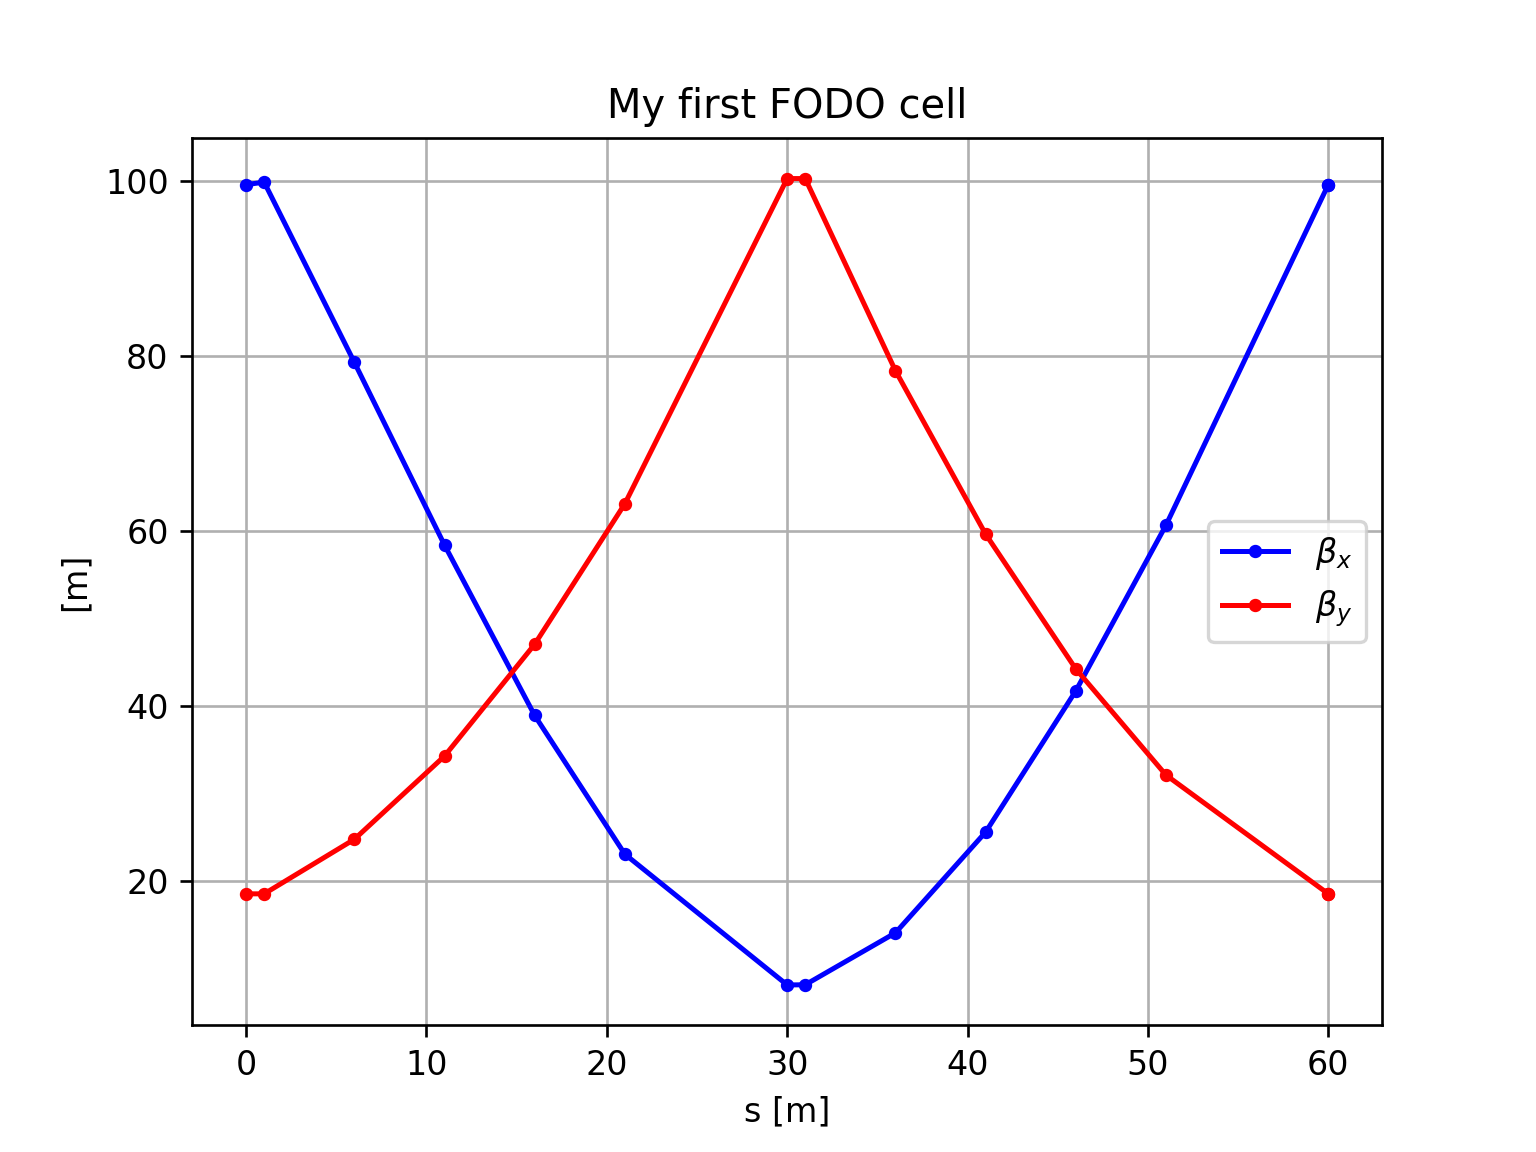

Text(0.5, 1.0, 'My first FODO cell')

In [354]:
%matplotlib notebook
# Plot
plt.plot(first_df['s'],first_df['betx'],'.-b',label='$\\beta_x$')
plt.plot(first_df['s'],first_df['bety'],'.-r',label='$\\beta_y$')
plt.legend()
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.title('My first FODO cell')

In [361]:
myMad = Madx()
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

quadrupoleLength=1;
dipoleLength=5;
cellLength=89;


myKF=0.031;
myKD=-0.031;
myAngle=0.074;

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

QF: quadrupole, L=quadrupoleLength, K1:=myKF;
QD: quadrupole, L=quadrupoleLength, K1:=myKD;
BM: sbend, L=dipoleLength, angle:=myAngle; 

! *********************************************************************
! Definition of sequence
! *********************************************************************

myCell:sequence, refer=entry, L=cellLength;
q1: QF, at=0;
B1: BM, at =5+quadrupoleLength/2, from=q1;
B2: BM, at =5+dipoleLength/2, from=B1;
q2: QD, at=cellLength/2;
B3: BM, at =5+quadrupoleLength/2, from=q2;
B4: BM, at =5+dipoleLength/2, from=B3;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=electron, energy=4;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS BEFORE MATCHING
! *********************************************************************

twiss, table=beforematching, file="BeforeMatching.txt";
!plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="BeforeMatching";

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! MATCHING
! *********************************************************************

MATCH, SEQUENCE=myCell;
CONSTRAINT, SEQUENCE=myCell, RANGE=q1, BETX=100.0;
CONSTRAINT, SEQUENCE=myCell, RANGE=q2, BETY=100.0;
VARY, NAME= myKF, STEP=0.000001;
!VARY, NAME= myKD, STEP=0.000001;
VARY, NAME= myAngle, STEP=0.000001;
LMDIF, CALLS=1000, TOLERANCE=1e-12;//method adopted
ENDMATCH;

twiss, table=beforematching, file="BeforeMatching.txt";
!plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="BeforeMatching";

'''
myMad.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.12.08 18:51:37      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
                89                 -0       0.0364182989        5.240107203 

                q1                dq1            betxmax              dxmax 
      0.2646771955      -0.2889469126         140.980247        15.68114778 

             dxrms             xcomax             xcorms                 q2 
       12.24148836                  0                  0       0.2400057369 

               dq2            betymax              dymax 